# Deep Quantile Regression

One area that Deep Learning has not explored extensively is the uncertainty in estimates. However, as far as decision making goes, most people actually require quantiles as opposed to true uncertainty in an estimate. eg. For a given age the weight of an individual will vary. What would be interesting is the (for arguments sake) the 10th and 90th percentile. The uncertainty of _the estimate_ of an individuals weight is less interesting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

%matplotlib inline

mcycle = pd.read_csv('mcycle',delimiter='\t')

Standardise the inputs and outputs so that it is easier to train. I have't saved the mean and standard deviations, but you should.

In [3]:
mcycle.times = (mcycle.times - mcycle.times.mean())/mcycle.times.std()
mcycle.accel = (mcycle.accel - mcycle.accel.mean())/mcycle.accel.std()

In [21]:
mcycle

,times,accel,strata,v
0,-1.684002,0.430638,1,3.7
1,-1.669670,0.404939,1,3.7
2,-1.626675,0.377263,1,3.7
3,-1.598011,0.430638,1,3.7
4,-1.569347,0.377263,1,3.7
...,...,...,...,...
89,1.870317,0.642161,3,138.0
90,1.956309,0.140041,3,138.0
91,2.085296,0.377263,3,138.0
92,2.113960,0.377263,3,138.0


In [22]:
model = Sequential()
model.add(Dense(units=10, input_dim=1,activation='relu'))
model.add(Dense(units=10, input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adadelta')
model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=100)
model.evaluate(mcycle.times.values, mcycle.accel.values)

Epoch 1/2000
Epoch 2/2000
Epoch 3/2000
Epoch 4/2000
Epoch 5/2000
Epoch 6/2000
Epoch 7/2000
Epoch 8/2000
Epoch 9/2000
Epoch 10/2000
Epoch 11/2000
Epoch 12/2000
Epoch 13/2000
Epoch 14/2000
Epoch 15/2000
Epoch 16/2000
Epoch 17/2000
Epoch 18/2000
Epoch 19/2000
Epoch 20/2000
Epoch 21/2000
Epoch 22/2000
Epoch 23/2000
Epoch 24/2000
Epoch 25/2000
Epoch 26/2000
Epoch 27/2000
Epoch 28/2000
Epoch 29/2000
Epoch 30/2000
Epoch 31/2000
Epoch 32/2000
Epoch 33/2000
Epoch 34/2000
Epoch 35/2000
Epoch 36/2000
Epoch 37/2000
Epoch 38/2000
Epoch 39/2000
Epoch 40/2000
Epoch 41/2000
Epoch 42/2000
Epoch 43/2000
Epoch 44/2000
Epoch 45/2000
Epoch 46/2000
Epoch 47/2000
Epoch 48/2000
Epoch 49/2000
Epoch 50/2000
Epoch 51/2000
Epoch 52/2000
Epoch 53/2000
Epoch 54/2000
Epoch 55/2000
Epoch 56/2000
Epoch 57/2000
Epoch 58/2000
Epoch 59/2000
Epoch 60/2000
Epoch 61/2000
Epoch 62/2000
Epoch 63/2000
Epoch 64/2000
Epoch 65/2000
Epoch 66/2000
Epoch 67/2000
Epoch 68/2000
Epoch 69/2000
Epoch 70/2000
Epoch 71/2000
Epoch 72/2000
E

Epoch 632/2000
Epoch 633/2000
Epoch 634/2000
Epoch 635/2000
Epoch 636/2000
Epoch 637/2000
Epoch 638/2000
Epoch 639/2000
Epoch 640/2000
Epoch 641/2000
Epoch 642/2000
Epoch 643/2000
Epoch 644/2000
Epoch 645/2000
Epoch 646/2000
Epoch 647/2000
Epoch 648/2000
Epoch 649/2000
Epoch 650/2000
Epoch 651/2000
Epoch 652/2000
Epoch 653/2000
Epoch 654/2000
Epoch 655/2000
Epoch 656/2000
Epoch 657/2000
Epoch 658/2000
Epoch 659/2000
Epoch 660/2000
Epoch 661/2000
Epoch 662/2000
Epoch 663/2000
Epoch 664/2000
Epoch 665/2000
Epoch 666/2000
Epoch 667/2000
Epoch 668/2000
Epoch 669/2000
Epoch 670/2000
Epoch 671/2000
Epoch 672/2000
Epoch 673/2000
Epoch 674/2000
Epoch 675/2000
Epoch 676/2000
Epoch 677/2000
Epoch 678/2000
Epoch 679/2000
Epoch 680/2000
Epoch 681/2000
Epoch 682/2000
Epoch 683/2000
Epoch 684/2000
Epoch 685/2000
Epoch 686/2000
Epoch 687/2000
Epoch 688/2000
Epoch 689/2000
Epoch 690/2000
Epoch 691/2000
Epoch 692/2000
Epoch 693/2000
Epoch 694/2000
Epoch 695/2000
Epoch 696/2000
Epoch 697/2000
Epoch 698/

Epoch 1254/2000
Epoch 1255/2000
Epoch 1256/2000
Epoch 1257/2000
Epoch 1258/2000
Epoch 1259/2000
Epoch 1260/2000
Epoch 1261/2000
Epoch 1262/2000
Epoch 1263/2000
Epoch 1264/2000
Epoch 1265/2000
Epoch 1266/2000
Epoch 1267/2000
Epoch 1268/2000
Epoch 1269/2000
Epoch 1270/2000
Epoch 1271/2000
Epoch 1272/2000
Epoch 1273/2000
Epoch 1274/2000
Epoch 1275/2000
Epoch 1276/2000
Epoch 1277/2000
Epoch 1278/2000
Epoch 1279/2000
Epoch 1280/2000
Epoch 1281/2000
Epoch 1282/2000
Epoch 1283/2000
Epoch 1284/2000
Epoch 1285/2000
Epoch 1286/2000
Epoch 1287/2000
Epoch 1288/2000
Epoch 1289/2000
Epoch 1290/2000
Epoch 1291/2000
Epoch 1292/2000
Epoch 1293/2000
Epoch 1294/2000
Epoch 1295/2000
Epoch 1296/2000
Epoch 1297/2000
Epoch 1298/2000
Epoch 1299/2000
Epoch 1300/2000
Epoch 1301/2000
Epoch 1302/2000
Epoch 1303/2000
Epoch 1304/2000
Epoch 1305/2000
Epoch 1306/2000
Epoch 1307/2000
Epoch 1308/2000
Epoch 1309/2000
Epoch 1310/2000
Epoch 1311/2000
Epoch 1312/2000
Epoch 1313/2000
Epoch 1314/2000
Epoch 1315/2000
Epoch 13

Epoch 1773/2000
Epoch 1774/2000
Epoch 1775/2000
Epoch 1776/2000
Epoch 1777/2000
Epoch 1778/2000
Epoch 1779/2000
Epoch 1780/2000
Epoch 1781/2000
Epoch 1782/2000
Epoch 1783/2000
Epoch 1784/2000
Epoch 1785/2000
Epoch 1786/2000
Epoch 1787/2000
Epoch 1788/2000
Epoch 1789/2000
Epoch 1790/2000
Epoch 1791/2000
Epoch 1792/2000
Epoch 1793/2000
Epoch 1794/2000
Epoch 1795/2000
Epoch 1796/2000
Epoch 1797/2000
Epoch 1798/2000
Epoch 1799/2000
Epoch 1800/2000
Epoch 1801/2000
Epoch 1802/2000
Epoch 1803/2000
Epoch 1804/2000
Epoch 1805/2000
Epoch 1806/2000
Epoch 1807/2000
Epoch 1808/2000
Epoch 1809/2000
Epoch 1810/2000
Epoch 1811/2000
Epoch 1812/2000
Epoch 1813/2000
Epoch 1814/2000
Epoch 1815/2000
Epoch 1816/2000
Epoch 1817/2000
Epoch 1818/2000
Epoch 1819/2000
Epoch 1820/2000
Epoch 1821/2000
Epoch 1822/2000
Epoch 1823/2000
Epoch 1824/2000
Epoch 1825/2000
Epoch 1826/2000
Epoch 1827/2000
Epoch 1828/2000
Epoch 1829/2000
Epoch 1830/2000
Epoch 1831/2000
Epoch 1832/2000
Epoch 1833/2000
Epoch 1834/2000
Epoch 18

0.6934692859649658

In [20]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


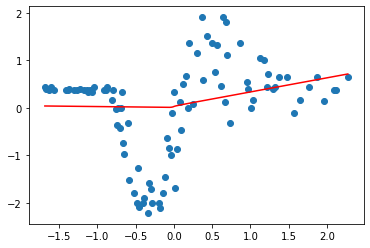

In [10]:
t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
y_test = model.predict(t_test)

plt.scatter(mcycle.times,mcycle.accel)
plt.plot(t_test, y_test,'r')
plt.show()

## Quantiles 0.1, 0.5, 0.9

The loss for an individual data point is defined as:
$$
\begin{align}
\mathcal{L}(\xi_i|\alpha)=\begin{cases}
\alpha \xi_i &\text{if }\xi_i\ge 0, \\
(\alpha-1) \xi_i &\text{if }\xi_i< 0.
\end{cases}
\end{align}
$$
where $\alpha$ is the required quantile and $\xi_i = y_i - f(\mathbf{x}_i)$ and, $f(\mathbf{x}_i)$ is the predicted (quantile) model. The final overall loss is defines as:
$$\mathcal{L}(\mathbf{y},\mathbf{f}|\alpha)=\frac{1}{N} \sum_{i=1}^N \mathcal{L}(y_i-f(\mathbf{x}_i)|\alpha)$$

The following function defines the loss function for a quantile model.

**Note**: The following 4 lines is ALL that you change in comparison to a normal Deep Learning method, i.e. The loss function is all that changes.

In [6]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [13]:
def mcycleModel():
    model = Sequential()
    model.add(Dense(units=32, input_dim=1,activation='relu'))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(1))
    
    return model

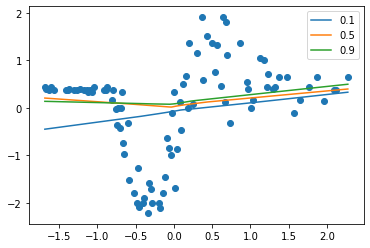

In [14]:
qs = [0.1, 0.5, 0.9]

t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
plt.scatter(mcycle.times,mcycle.accel)

for q in qs:
    model = mcycleModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adadelta')
    model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
    
    # Predict the quantile
    y_test = model.predict(t_test)
    plt.plot(t_test, y_test, label=q) # plot out this quantile

plt.legend()    
plt.show()    

## Final Notes

1. Note that the quantile 0.5 is the same as median, which you can attain by minimising Mean Absolute Error, which you can attain in Keras regardless with `loss='mae'`. 
2. Uncertainty and quantiles are **not** the same thing. But most of the time you care about quantiles and not uncertainty.
3. If you really do want uncertainty with deep nets checkout http://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html